In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/content/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.columns


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

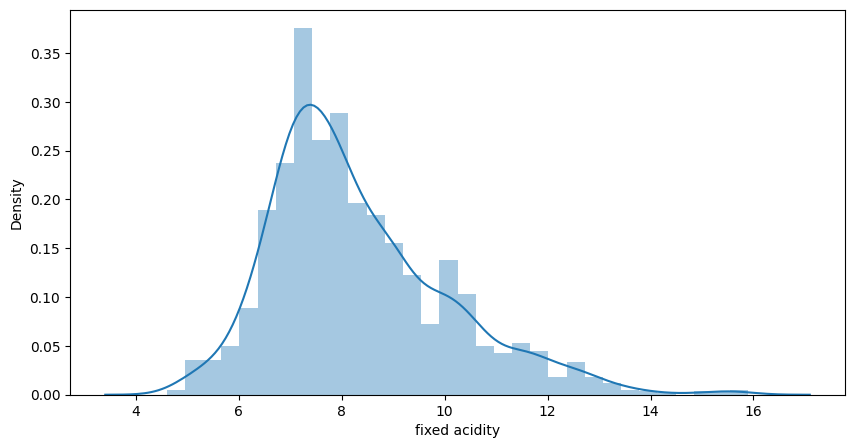

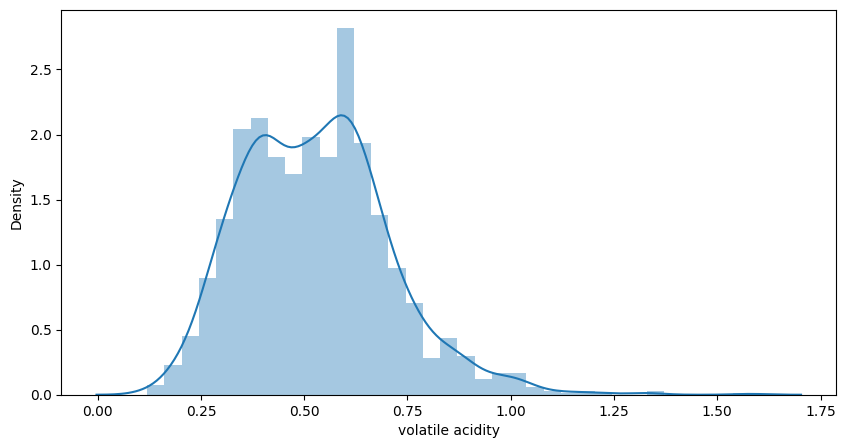

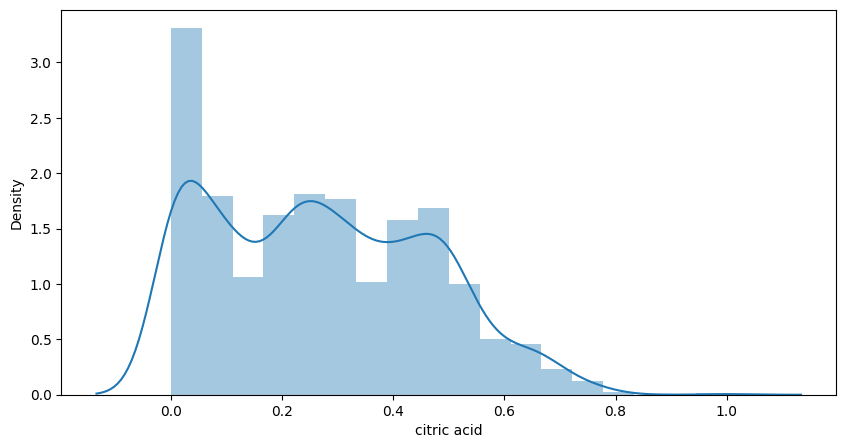

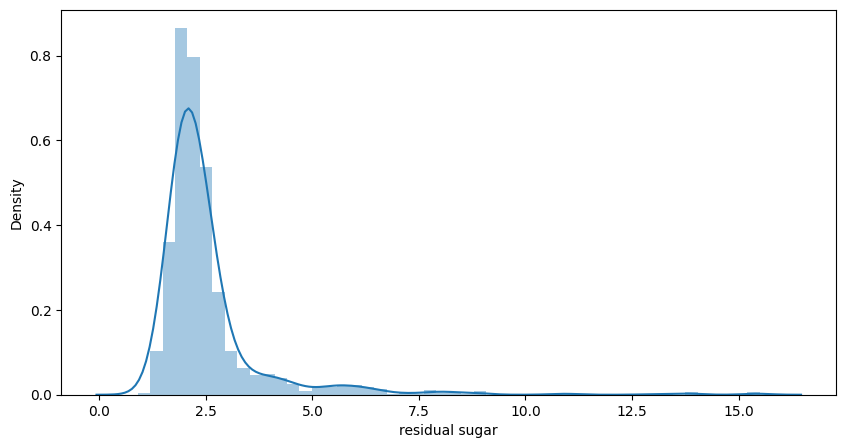

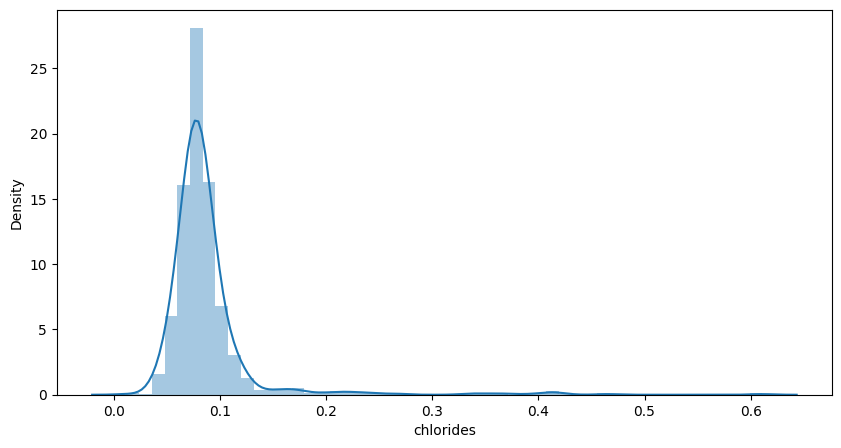

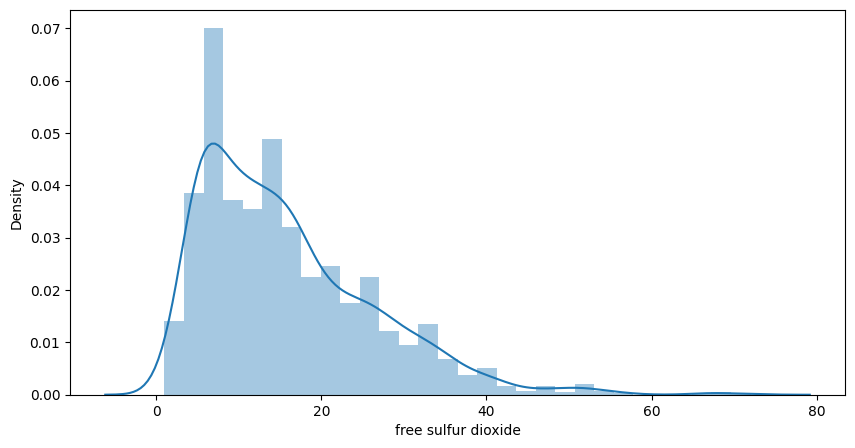

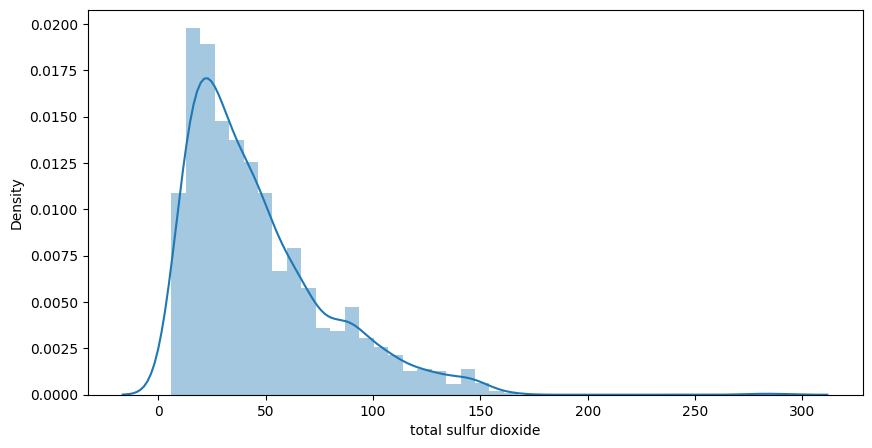

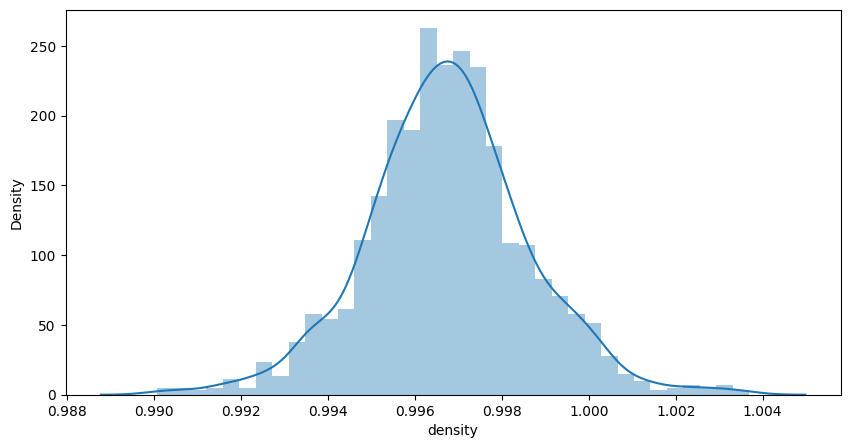

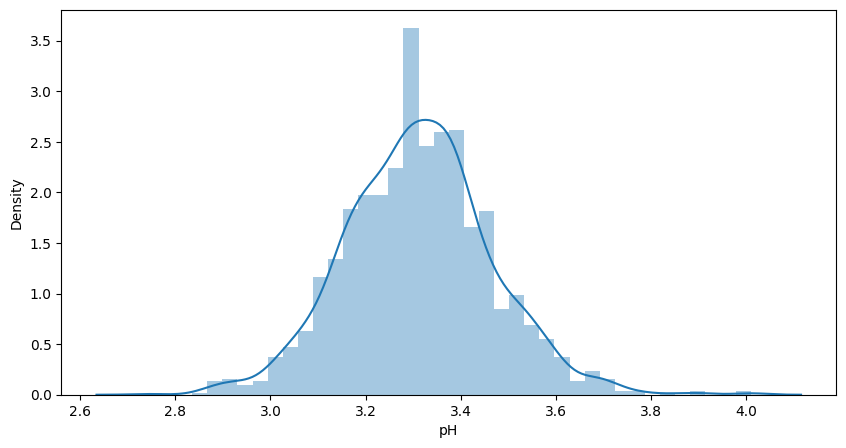

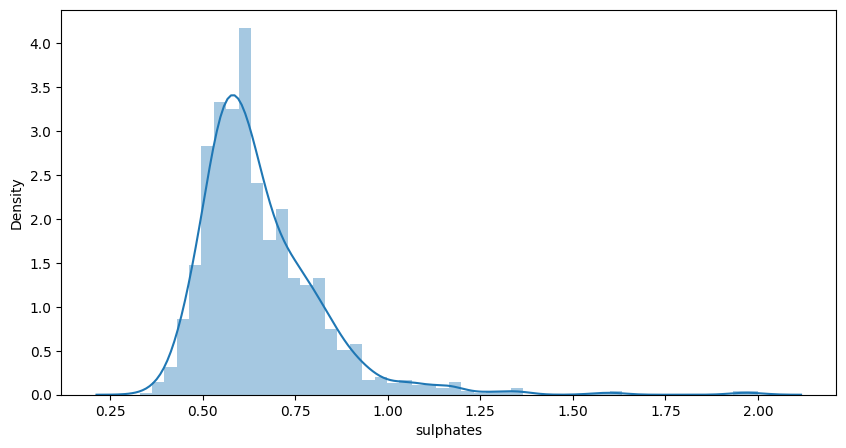

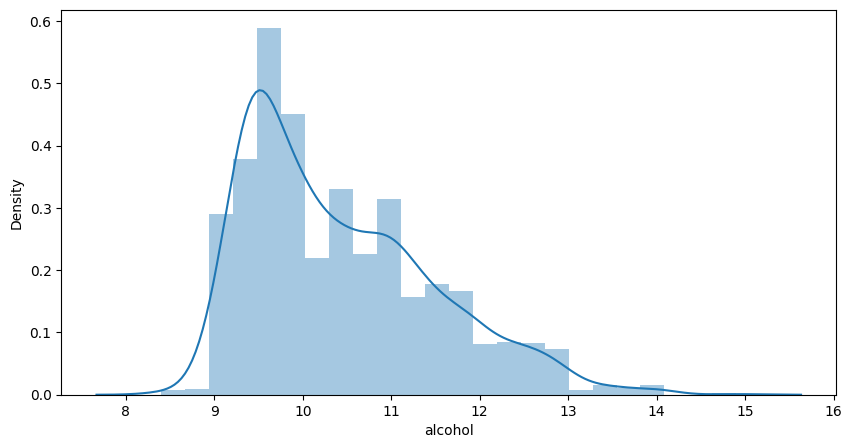

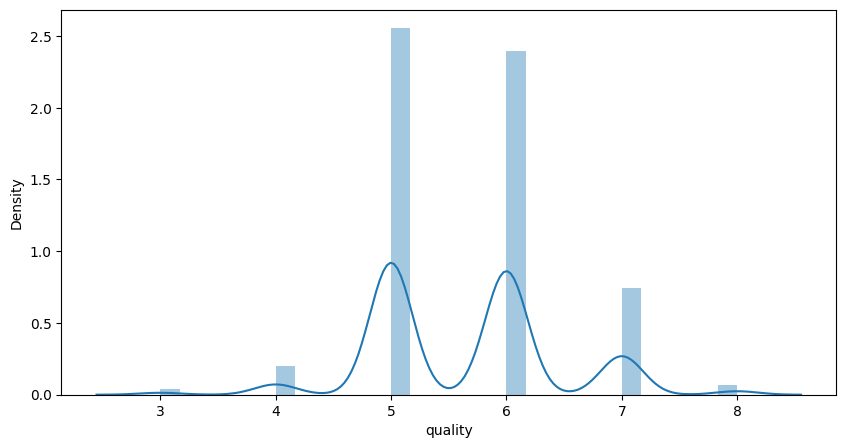

In [7]:
df_col = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']
for col in df_col:
  plt.figure(figsize=(10,5))
  sns.distplot(df[col],kde = True)
  plt.show()

In [8]:
X = df.drop('quality',axis=1)
y = df['quality']

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state =42,test_size=0.2)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled  = pd.DataFrame(X_test_scaled, columns=X.columns)

In [14]:
X_test_scaled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.361860,0.164286,-0.985153,-0.038651,0.518158,-0.181976,-0.019957,0.175732,-0.465393,-0.000134,-0.777453
1,-0.303841,-0.170525,-0.524492,-0.665729,-0.130756,0.497011,1.680668,-0.417191,0.508915,-1.031438,-0.872484
2,1.378715,0.778108,-0.268569,0.100700,0.376208,0.109019,-0.384376,1.954501,-0.205577,1.833295,-0.492358
3,0.102293,-0.393733,0.192092,-0.212839,-0.211871,1.563989,0.344463,0.660851,0.119192,-0.687670,-0.587390
4,-0.942051,-0.393733,-0.166200,-0.596054,-0.232149,0.206017,-0.384376,-1.064016,0.508915,-0.343902,0.172862
...,...,...,...,...,...,...,...,...,...,...,...
315,-0.884032,0.610702,-1.394630,0.100700,0.700665,-0.084978,-0.414744,-0.751384,0.833684,-0.172018,0.838083
316,-1.000070,0.554900,-1.394630,1.215505,0.092308,3.406953,0.936645,-0.643580,-0.725208,-1.203322,-0.872484
317,-0.013745,0.387494,-0.115015,-0.247677,0.599272,-0.666966,-0.262903,-0.330948,-1.049977,-0.744965,-0.587390
318,0.276351,-1.453971,0.601569,-0.387028,0.234258,0.400013,-0.596954,-0.708262,-1.049977,0.171750,0.743051


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train_scaled,y_train)
y_pred = lr.predict(X_test_scaled)

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(mse,r2)

0.3900251439639549 0.403180341279622


In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf = RandomForestRegressor(random_state = 42)
rf.fit(X_train_scaled,y_train)
y_pred = rf.predict(X_test_scaled)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("MSE :", mse)
print("r2_score :", r2)

MSE : 0.3006603124999999
r2_score : 0.5399271357910311


In [56]:
# ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential([
    Dense(32,activation = "relu",input_shape = (X_train_scaled.shape[1],)),
    Dense(16,activation ="relu"),
    Dense(1)
])

In [57]:
model.compile(optimizer='adam',loss='mse')

In [58]:
history = model.fit(
    X_train_scaled,y_train,
    validation_data = (X_test_scaled,y_test),
    epochs=50,
    batch_size =10,
    verbose = 1,
    )

Epoch 1/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 27.4044 - val_loss: 4.3055
Epoch 2/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.8538 - val_loss: 2.1126
Epoch 3/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.0951 - val_loss: 1.6310
Epoch 4/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.6589 - val_loss: 1.3570
Epoch 5/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3124 - val_loss: 1.1722
Epoch 6/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1225 - val_loss: 1.0312
Epoch 7/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9949 - val_loss: 0.9067
Epoch 8/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8471 - val_loss: 0.8025
Epoch 9/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7122 - val_loss: 0.7332
Epoch 10/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7943 - val_loss: 0.6482
Epoch 11/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6239 - val_loss: 0.5938
Epoch 12/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/st

In [59]:
ann_pred = model.predict(X_test_scaled)
ann_mse = mean_squared_error(y_test,ann_pred)
ann_r2 = r2_score(y_test,ann_pred)
print("MSE:" , ann_mse)
print("R2_Score:" , ann_r2)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
MSE: 0.3831149935722351
R2_Score: 0.41375428438186646


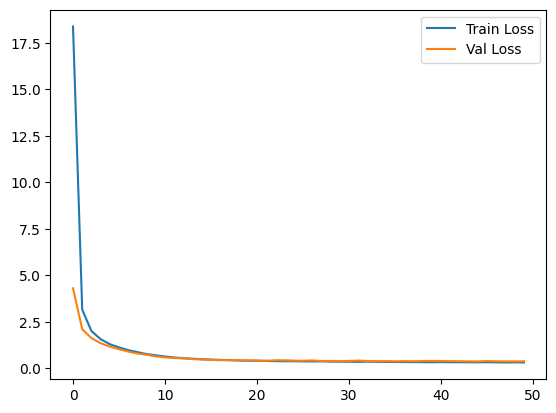

In [60]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()